# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Place those cities into a dataframe
cities_df = pd.DataFrame({"city": cities})

#Create empty columns for the data we want to retrieve from the API
cities_df['lat'] = ''
cities_df['lng'] = ''
cities_df['humidity'] = ''
cities_df['temp'] = ''
cities_df['max_temp'] = ''
cities_df['clouds'] = ''
cities_df['wind'] = ''


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Grab base url
base_url = 'https://api.openweathermap.org/data/2.5/weather?q='

for index, row in cities_df.iterrows():
    
    city_search = row['city']
    
    #Create full url with imperial units
    full_url = f"{base_url}{city_search}&appid={api_key}&units=imperial"
    
    #Make the api request
    weather = requests.get(full_url).json()

    #Append values requested to the data frame
    try:
        print(f"Requesting data for {city_search}...")
        cities_df.loc[index, 'lat'] = weather['coord']['lat']
        cities_df.loc[index, 'lng'] = weather['coord']['lon']
        cities_df.loc[index, 'humidity'] = weather['main']['humidity']
        cities_df.loc[index, 'temp'] = weather['main']['temp']
        cities_df.loc[index, 'max_temp'] = weather['main']['temp_max']
        cities_df.loc[index, 'clouds'] = weather['clouds']['all']
        cities_df.loc[index, 'wind'] = weather['wind']['speed']
    #If missing values, indicate with print statement
    except(KeyError, IndexError):
        print(f"{city_search} is missing field(s) ... skipping")


Requesting data for shingu...
Requesting data for punta arenas...
Requesting data for yellowknife...
Requesting data for busselton...
Requesting data for masuguru...
Requesting data for port alfred...
Requesting data for marquette...
Requesting data for fortuna...
Requesting data for chokurdakh...
Requesting data for uarini...
Requesting data for mataura...
Requesting data for puerto del rosario...
Requesting data for habiganj...
Requesting data for ribeira grande...
Requesting data for mount gambier...
Requesting data for hermanus...
Requesting data for huangzhai...
Requesting data for dikson...
Requesting data for serenje...
Requesting data for cape town...
Requesting data for muros...
Requesting data for albany...
Requesting data for cabo san lucas...
Requesting data for tuktoyaktuk...
Requesting data for marcona...
marcona is missing field(s) ... skipping
Requesting data for avarua...
Requesting data for bereda...
Requesting data for kiruna...
Requesting data for verkhnetulomskiy..

Requesting data for lingyuan...
Requesting data for jinxiang...
Requesting data for concarneau...
Requesting data for bambui...
Requesting data for richmond...
Requesting data for vao...
Requesting data for hay river...
Requesting data for mahebourg...
Requesting data for tasiilaq...
Requesting data for santiago...
Requesting data for mafinga...
Requesting data for bathsheba...
Requesting data for yar-sale...
Requesting data for bay roberts...
Requesting data for salalah...
Requesting data for opuwo...
Requesting data for moose factory...
Requesting data for biak...
Requesting data for coos bay...
Requesting data for qaqortoq...
Requesting data for labelle...
Requesting data for airai...
Requesting data for faanui...
Requesting data for sovetskoye...
Requesting data for pietarsaari...
Requesting data for lagoa...
Requesting data for meridian...
Requesting data for arman...
Requesting data for gillette...
Requesting data for nguiu...
nguiu is missing field(s) ... skipping
Requesting dat

Requesting data for barcelona...
Requesting data for san cristobal...
Requesting data for de-kastri...
Requesting data for kishtwar...
Requesting data for dakar...
Requesting data for jalu...
Requesting data for tumannyy...
tumannyy is missing field(s) ... skipping
Requesting data for puri...
Requesting data for tres passos...
Requesting data for iqaluit...
Requesting data for poum...
Requesting data for samusu...
samusu is missing field(s) ... skipping
Requesting data for vardo...
Requesting data for yirol...
yirol is missing field(s) ... skipping
Requesting data for ocean city...
Requesting data for eseka...
Requesting data for asau...
Requesting data for dourbali...
Requesting data for safwah...
safwah is missing field(s) ... skipping
Requesting data for vaitape...
Requesting data for elko...
Requesting data for andselv...
andselv is missing field(s) ... skipping
Requesting data for ambilobe...
Requesting data for flin flon...
Requesting data for black river...
Requesting data for k

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
cities_df

,city,lat,lng,humidity,temp,max_temp,clouds,wind
0,shingu,33.7333,135.983,82,50.72,50.72,100,11.45
1,punta arenas,-53.15,-70.9167,67,55.2,55.4,75,23.02
2,yellowknife,62.456,-114.353,84,-3.28,-2,75,10.36
3,busselton,-33.65,115.333,78,62.08,64,0,3
4,masuguru,-11.3667,38.4167,93,72.82,72.82,98,3.27
...,...,...,...,...,...,...,...,...
612,orange,33.7,-117.767,45,65.93,69.01,75,1.97
613,cumaribo,,,,,,,
614,santa maria,-29.6842,-53.8069,66,86,86,40,4.61
615,jinchang,38.4953,102.174,64,20.98,20.98,0,1.86


In [5]:
#Drop row if there is an empty string in any cell
for index, row in cities_df.iterrows():
    if (row['lat'] == '') | (row['lng'] == '') | (row['humidity'] == '') | (row['temp'] == '') | (row['clouds'] == '') | (row['wind'] == ''):
        cities_df.drop(index,inplace=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [59]:
#Clear out all cities where humidity is > 100%
clean_cities_df = cities_df.loc[cities_df['humidity'] < 100, :]

clean_cities_df

clean_cities_df.to_csv('city_data.csv')

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0, 0.5, 'Latitude')

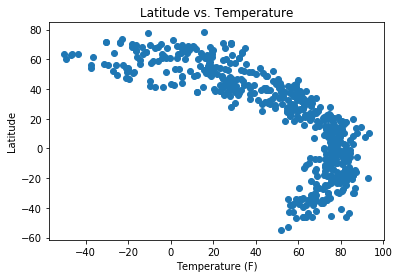

In [7]:
#Plot
plt.scatter(clean_cities_df['temp'], clean_cities_df['lat'])

#Labels, etc
plt.title('Latitude vs. Temperature')
plt.xlabel('Temperature (F)')
plt.ylabel('Latitude')

## Latitude vs. Humidity Plot

Text(0, 0.5, 'Latitude')

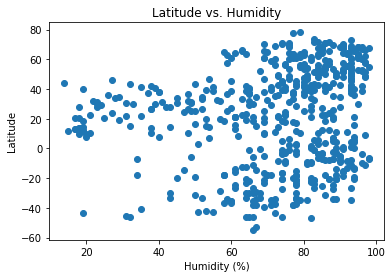

In [8]:
#Plot
plt.scatter(clean_cities_df['humidity'], clean_cities_df['lat'])

#Labels, etc
plt.title('Latitude vs. Humidity')
plt.xlabel('Humidity (%)')
plt.ylabel('Latitude')

## Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Latitude')

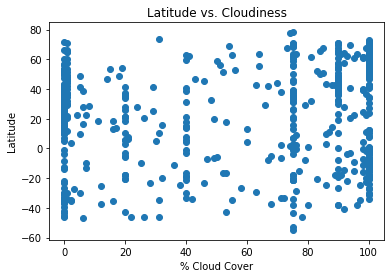

In [9]:
#Plot
plt.scatter(clean_cities_df['clouds'], clean_cities_df['lat'])

#Labels, etc
plt.title('Latitude vs. Cloudiness')
plt.xlabel('% Cloud Cover')
plt.ylabel('Latitude')

## Latitude vs. Wind Speed Plot

Text(0, 0.5, 'Latitude')

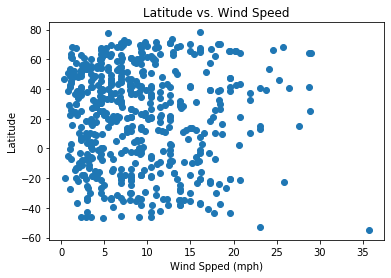

In [10]:
#Plot
plt.scatter(clean_cities_df['wind'], clean_cities_df['lat'])

#Labels, etc
plt.title('Latitude vs. Wind Speed')
plt.xlabel('Wind Spped (mph)')
plt.ylabel('Latitude')

## Linear Regression

In [11]:
#Filter to northern latitudes only
#Northern df also includes where lat = 0
northern_lats = clean_cities_df.loc[clean_cities_df['lat'] >= 0, :]

#Filter to southern latitudes only
southern_lats = clean_cities_df.loc[clean_cities_df['lat'] < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Text(35, 75, 'y = -0.5x + 58.1')

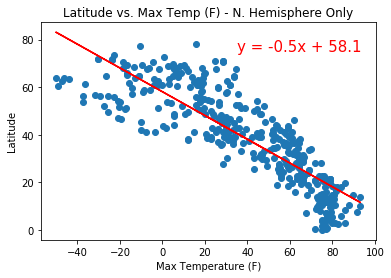

In [24]:
#Calculations for finding the components of the regression line
x_values = northern_lats['max_temp']
y_values = northern_lats['lat']

#Get values for the regression line for plotting
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values.astype('float'), y_values.astype('float'))
regress_values = x_values * slope + intercept

#Get equation for the linear regression
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot scatter and regression line over the top
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

#Labels, etc
plt.title('Latitude vs. Max Temp (F) - N. Hemisphere Only')
plt.xlabel('Max Temperature (F)')
plt.ylabel('Latitude')

#Put equation on the plot
plt.annotate(line_eq,(35, 75),fontsize=15,color="red")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Text(73, -53, 'y = 0.89x + -87.54')

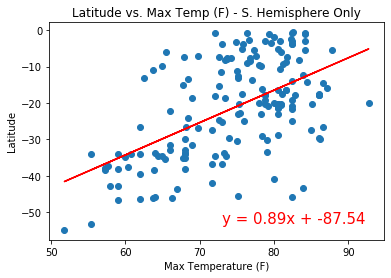

In [31]:
#Calculations for finding the components of the regression line
x_values = southern_lats['max_temp']
y_values = southern_lats['lat']

#Get values for the regression line for plotting
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values.astype('float'), y_values.astype('float'))
regress_values = x_values * slope + intercept

#Get equation for the linear regression
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot scatter and regression line over the top
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

#Labels, etc
plt.title('Latitude vs. Max Temp (F) - S. Hemisphere Only')
plt.xlabel('Max Temperature (F)')
plt.ylabel('Latitude')

#Put equation on the plot
plt.annotate(line_eq,(73, -53),fontsize=15,color="red")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Text(15, 60, 'y = 0.35x + 13.9')

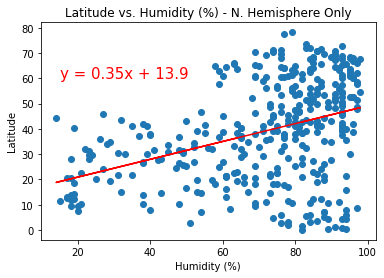

In [36]:
#Calculations for finding the components of the regression line
x_values = northern_lats['humidity']
y_values = northern_lats['lat']

#Get values for the regression line for plotting
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values.astype('float'), y_values.astype('float'))
regress_values = x_values * slope + intercept

#Get equation for the linear regression
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot scatter and regression line over the top
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

#Labels, etc
plt.title('Latitude vs. Humidity (%) - N. Hemisphere Only')
plt.xlabel('Humidity (%)')
plt.ylabel('Latitude')

#Put equation on the plot
plt.annotate(line_eq,(15, 60),fontsize=15,color="red")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Text(20, -53, 'y = 0.37x + -48.65')

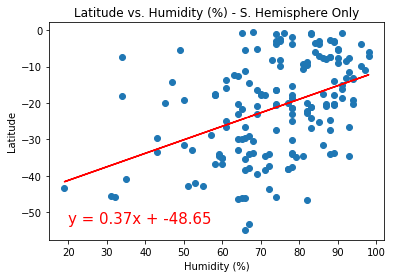

In [38]:
#Calculations for finding the components of the regression line
x_values = southern_lats['humidity']
y_values = southern_lats['lat']

#Get values for the regression line for plotting
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values.astype('float'), y_values.astype('float'))
regress_values = x_values * slope + intercept

#Get equation for the linear regression
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot scatter and regression line over the top
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

#Labels, etc
plt.title('Latitude vs. Humidity (%) - S. Hemisphere Only')
plt.xlabel('Humidity (%)')
plt.ylabel('Latitude')

#Put equation on the plot
plt.annotate(line_eq,(20, -53),fontsize=15,color="red")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Text(6, 75, 'y = 0.16x + 30.38')

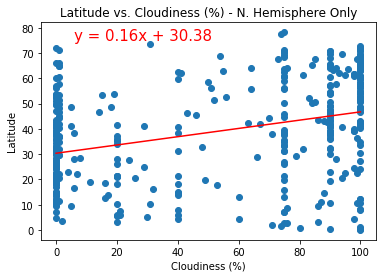

In [44]:
#Calculations for finding the components of the regression line
x_values = northern_lats['clouds']
y_values = northern_lats['lat']

#Get values for the regression line for plotting
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values.astype('float'), y_values.astype('float'))
regress_values = x_values * slope + intercept

#Get equation for the linear regression
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot scatter and regression line over the top
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

#Labels, etc
plt.title('Latitude vs. Cloudiness (%) - N. Hemisphere Only')
plt.xlabel('Cloudiness (%)')
plt.ylabel('Latitude')

#Put equation on the plot
plt.annotate(line_eq,(6, 75),fontsize=15,color="red")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Text(4, -53, 'y = 0.12x + -28.56')

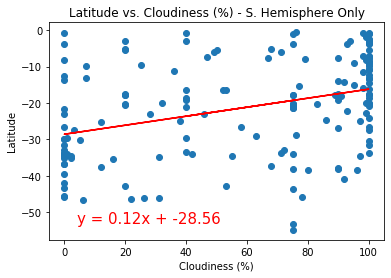

In [50]:
#Calculations for finding the components of the regression line
x_values = southern_lats['clouds']
y_values = southern_lats['lat']

#Get values for the regression line for plotting
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values.astype('float'), y_values.astype('float'))
regress_values = x_values * slope + intercept

#Get equation for the linear regression
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot scatter and regression line over the top
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

#Labels, etc
plt.title('Latitude vs. Cloudiness (%) - S. Hemisphere Only')
plt.xlabel('Cloudiness (%)')
plt.ylabel('Latitude')

#Put equation on the plot
plt.annotate(line_eq,(4, -53),fontsize=15,color="red")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Text(14, 75, 'y = 0.14x + 37.98')

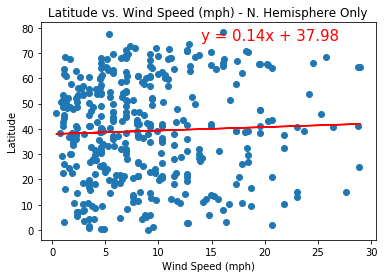

In [55]:
#Calculations for finding the components of the regression line
x_values = northern_lats['wind']
y_values = northern_lats['lat']

#Get values for the regression line for plotting
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values.astype('float'), y_values.astype('float'))
regress_values = x_values * slope + intercept

#Get equation for the linear regression
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot scatter and regression line over the top
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

#Labels, etc
plt.title('Latitude vs. Wind Speed (mph) - N. Hemisphere Only')
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Latitude')

#Put equation on the plot
plt.annotate(line_eq,(14, 75),fontsize=15,color="red")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Text(21, -40, 'y = -0.47x + -16.9')

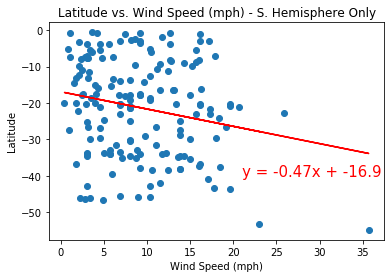

In [57]:
#Calculations for finding the components of the regression line
x_values = southern_lats['wind']
y_values = southern_lats['lat']

#Get values for the regression line for plotting
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values.astype('float'), y_values.astype('float'))
regress_values = x_values * slope + intercept

#Get equation for the linear regression
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot scatter and regression line over the top
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

#Labels, etc
plt.title('Latitude vs. Wind Speed (mph) - S. Hemisphere Only')
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Latitude')

#Put equation on the plot
plt.annotate(line_eq,(21, -40),fontsize=15,color="red")